# (1) Creating the bank_marketing database and loading the data into postgreSQL

In [1]:
#importing the necessary packages

import psycopg2
import csv
import pandas as pd
import pandas.io.sql as sqlio

In [42]:
#Creating the database bank_marketing using try and exception blocks

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "localhost",
    port = "5432",
    database = "postgres")
    dbConnection.set_isolation_level(0) #Auto Commit
    dbCursor = dbConnection.cursor()
    #SQL query to create the database
    dbCursor.execute('CREATE DATABASE bank_marketing;')
    dbCursor.close()
except (Exception, psycopg2.Error) as dbError:
    print("Error while connecting to postgreSQL", dbError)
finally:
    if(dbConnection):dbConnection.close()

In [43]:
#Creating the bank table in the bank_marketing database using try and exception blocks

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "localhost",
    port = "5432",
    database = "bank_marketing")
    dbConnection.set_isolation_level(0) #Auto Commit
    dbCursor = dbConnection.cursor()
    #SQL query to create the table
    dbCursor.execute("""          
    CREATE TABLE bank(
    age integer,
    job text,
    marital text,
    education text,
    defaulters text,
    balance integer,
    housing text,
    loan text,
    contact text,
    day integer,
    month text,
    duration integer,
    campaign integer,
    pdays integer,
    previous integer,
    poutcome text,
    deposit text); """)
    dbCursor.close()
except (Exception, psycopg2.Error) as dbError:
    print("Error while creating the table: ", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [44]:
#Loading the data from CSV file into postgreSQL using try and exception blocks

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "localhost",
    port = "5432",
    database = "bank_marketing")
    dbConnection.set_isolation_level(0) # Auto Commit
    dbCursor = dbConnection.cursor()
    with open("E:/DAP/Project/DS_1/bank.csv",'r') as s:
        reader = csv.reader(s)
        columns = next(reader)
        #SQL query to insert the values
        insertString = "INSERT INTO bank(age,job,marital,education,defaulters,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit) values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
        for data in reader:
            dbCursor.execute(insertString, data)
            dbConnection.commit()
        dbCursor.close()
except (Exception, psycopg2.Error) as dbError:
    print("Error while inserting values: ", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [2]:
#Pulling the loaded data from postgreSQl and loading into a dataframe using try and exception blocks

#SQl query to pull the data
sql = "SELECT * FROM bank"

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "localhost",
    port = "5432",
    database = "bank_marketing")
    #creating the dataframe and loading into it
    df = sqlio.read_sql(sql, dbConnection)
except (Exception, psycopg2.Error) as dbError:
    print("Error while pulling the data: ", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [3]:
#Displaying the dataframe

df

,age,job,marital,education,defaulters,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# (2) Visualising the data of dataframe with the help of matplotlib, plotly and seaborn

In [4]:
#Importing the necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import pandas.util.testing as tm
import missingno as msno

C:\Users\Gollamudi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#Calling the dataframe
df
term_deposits=df.copy()
df.head()

,age,job,marital,education,defaulters,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
#Checking the count, mean, std, min and max
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
#Checking the missing values, if there were any missing values we need to replace them with the median, mean or mode.

df.info()

#We can clearly see that there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age           11162 non-null int64
job           11162 non-null object
marital       11162 non-null object
education     11162 non-null object
defaulters    11162 non-null object
balance       11162 non-null int64
housing       11162 non-null object
loan          11162 non-null object
contact       11162 non-null object
day           11162 non-null int64
month         11162 non-null object
duration      11162 non-null int64
campaign      11162 non-null int64
pdays         11162 non-null int64
previous      11162 non-null int64
poutcome      11162 non-null object
deposit       11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


C:\Users\Gollamudi\Anaconda3\lib\site-packages\seaborn\matrix.py:287: UserWarning:

Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.

C:\Users\Gollamudi\Anaconda3\lib\site-packages\seaborn\matrix.py:287: UserWarning:

Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.



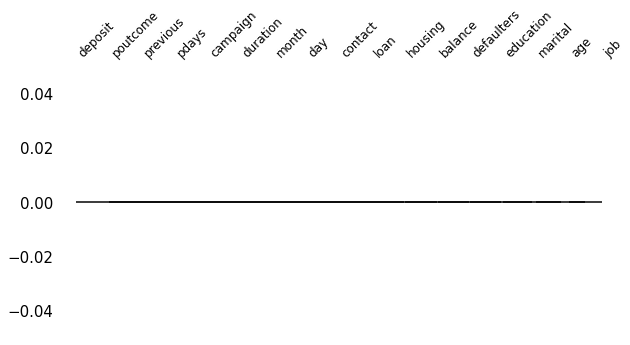

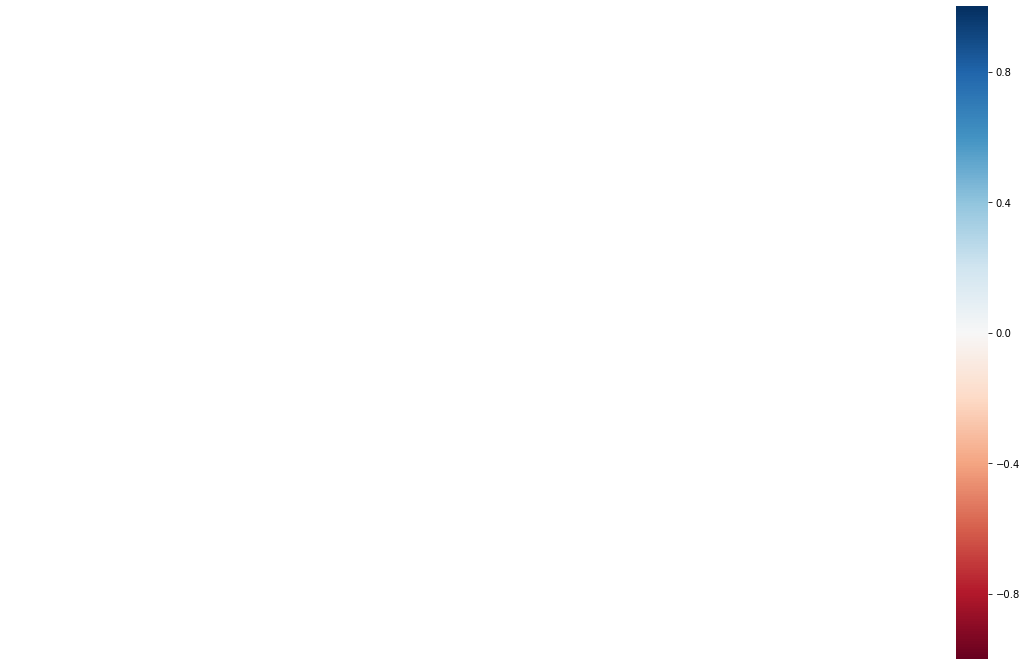

In [10]:
msno.dendrogram(df, figsize=(10,5), fontsize=12)
msno.heatmap(df)

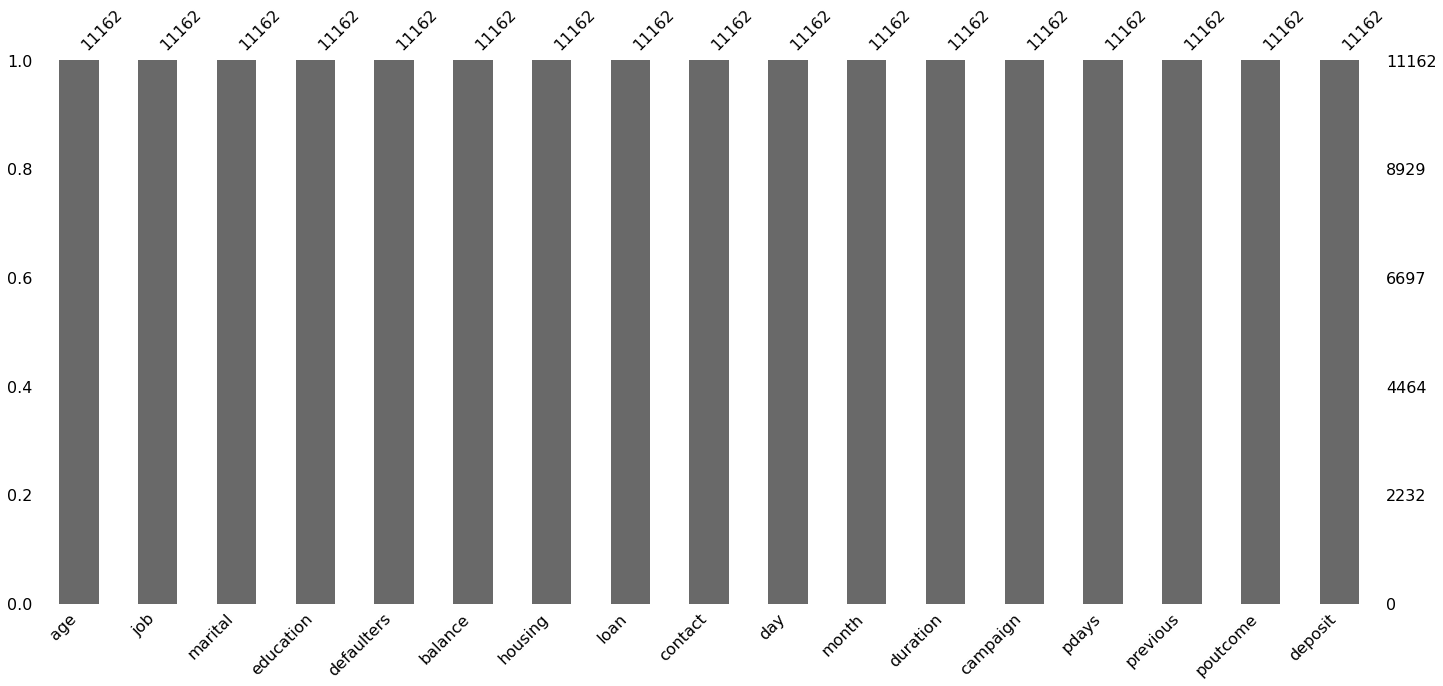

In [11]:
msno.bar(df)

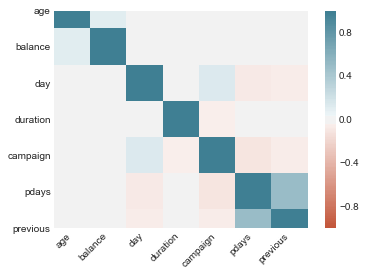

In [20]:
corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

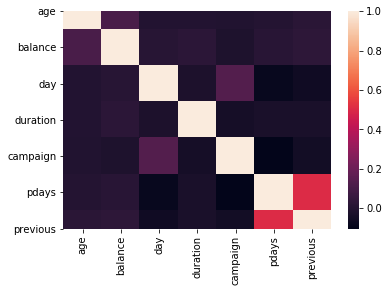

In [12]:
sns.heatmap(df.corr())

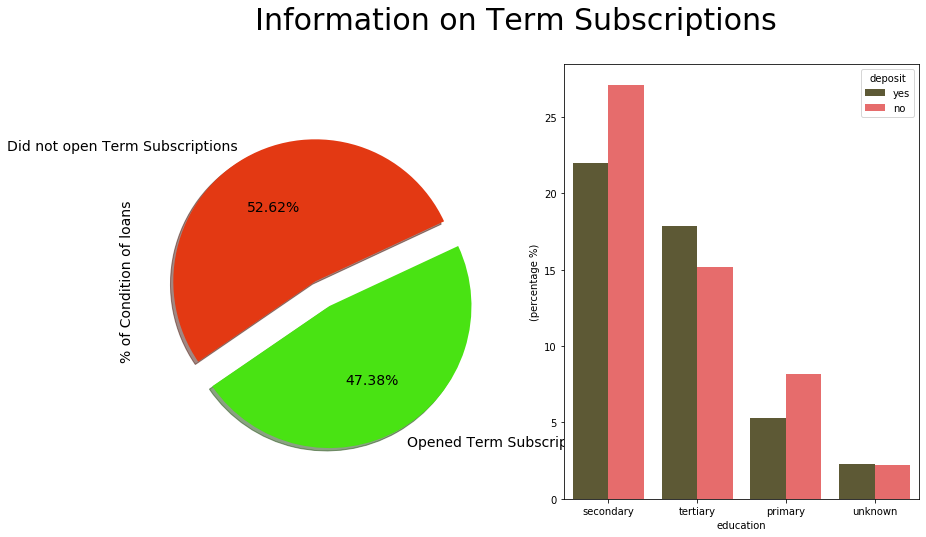

In [13]:
#Information on Term Subscriptions of depoit, balance and education

f, ax = plt.subplots(1,2, figsize=(14,8))
#Hex colors
colors = ["#E33913", "#49E313"]
labels = "Did not open Term Subscriptions", "Opened Term Subscriptions"
plt.suptitle("Information on Term Subscriptions", fontsize = 30)
df['deposit'].value_counts().plot.pie(explode = [0,0.2], autopct = '%1.2f%%', ax = ax[0], shadow = True, colors = colors, labels = labels, fontsize = 14, startangle = 25)
ax[0].set_ylabel('% of Condition of loans', fontsize = 14)

palette = ["#645E2E", "#FA5858"]
sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x)/len(df)*100)
ax[1].set(ylabel="(percentage %)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

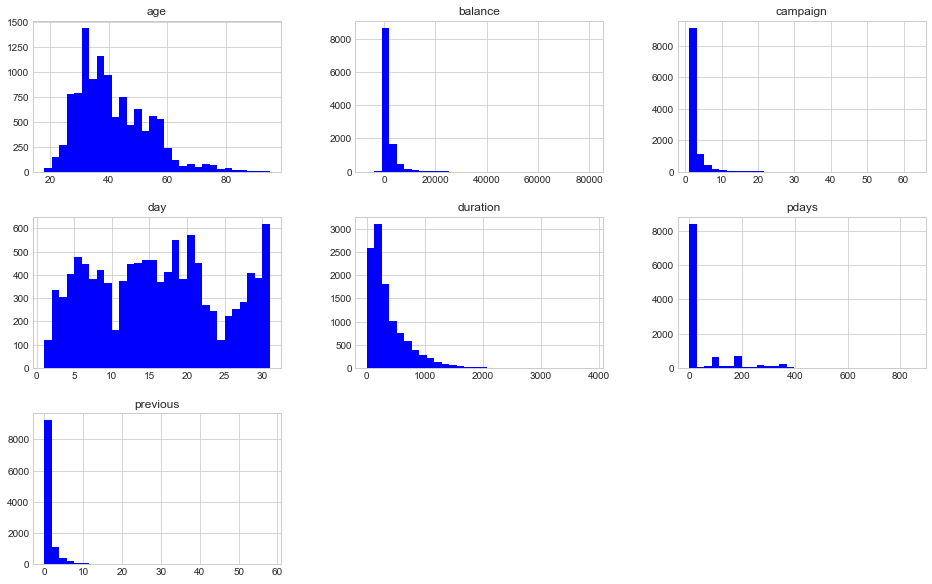

In [14]:
# Checking how the numeric data distributed
plt.style.use("seaborn-whitegrid")
df.hist(bins=30, figsize=(16,10), color="#0000FF")
plt.show()

In [15]:
#Checking the yes and no count of deposit column
df["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

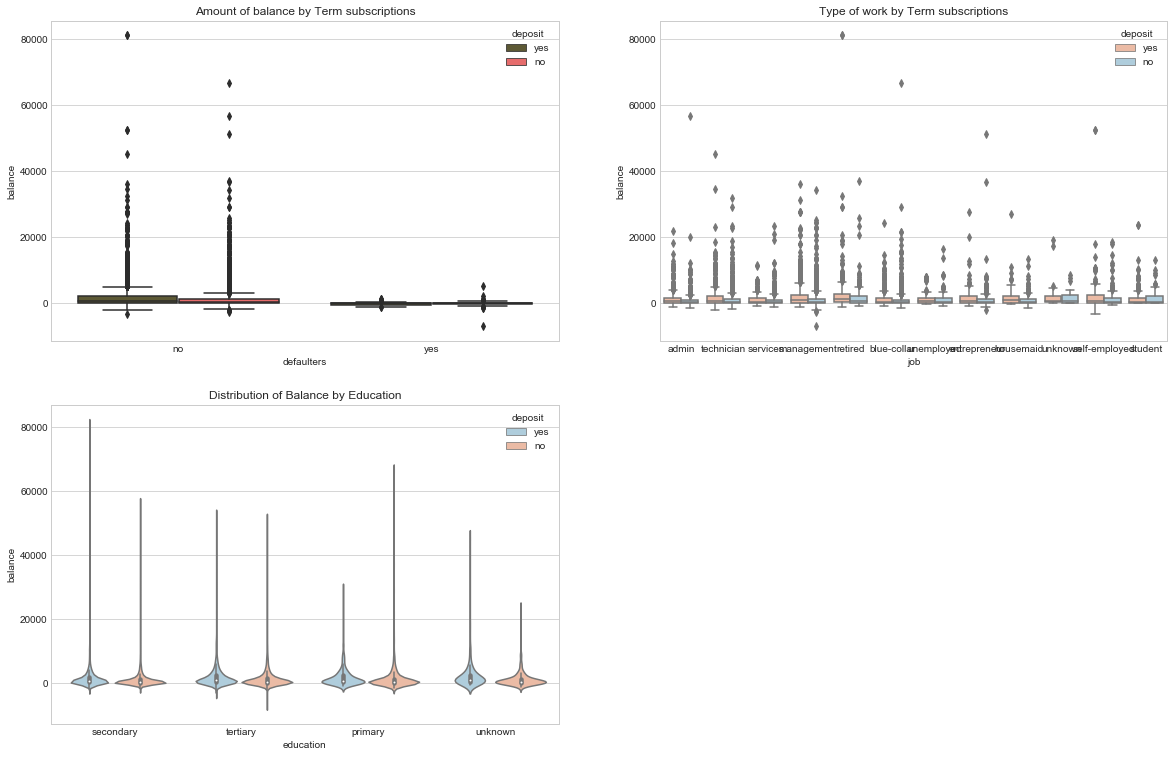

In [70]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
palette = ["#645E2E", "#FA5858"]
g = sns.boxplot(x="defaulters", y="balance", hue="deposit", data=df, palette=palette, ax=ax1)
g.set_title("Amount of balance by Term subscriptions")
g1 = sns.boxplot(x="job", y="balance", hue="deposit", data=df, palette="RdBu", ax=ax2)
g1.set_title("Type of work by Term subscriptions")
g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")
g2.set_title("Distribution of Balance by Education")
plt.show()

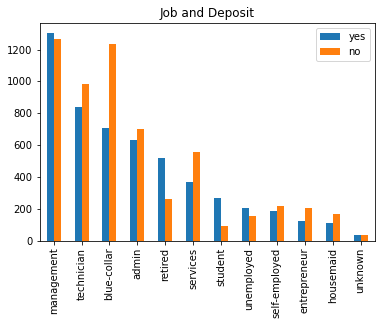

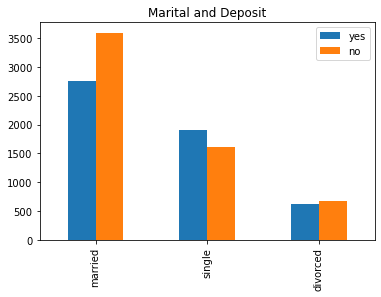

In [5]:
#Analysis of response column deposit, and comparing its values to other categorical columns
#job and deposit
sdf = pd.DataFrame()
sdf["yes"] = df[df["deposit"] == "yes"]["job"].value_counts()
sdf["no"] = df[df["deposit"] == "no"]["job"].value_counts()
sdf.plot.bar(title = "Job and Deposit")
#marital and deposit
pdf = pd.DataFrame()
pdf["yes"] = df[df["deposit"] == "yes"]["marital"].value_counts()
pdf["no"] = df[df["deposit"] == "no"]["marital"].value_counts()
pdf.plot.bar(title = "Marital and Deposit")

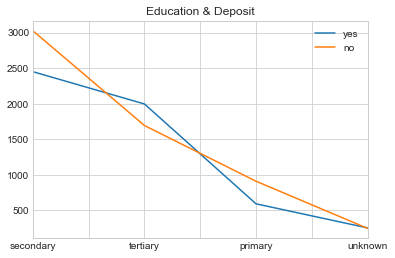

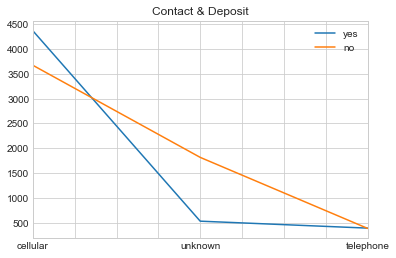

In [12]:
#education & deposit
gdf = pd.DataFrame()
gdf["yes"] = df[df["deposit"] == "yes"]["education"].value_counts()
gdf["no"] = df[df["deposit"] == "no"]["education"].value_counts()
gdf.plot.line(title = "Education & Deposit")
#contact & deposit
edf = pd.DataFrame()
edf["yes"] = df[df["deposit"] == "yes"]["contact"].value_counts()
edf["no"] = df[df["deposit"] == "no"]["contact"].value_counts()
edf.plot.line(title = "Contact & Deposit")

From the above diagrams we can tell that according to our dataset:
Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
Married customers are less likely to subscribe for term deposit.
Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

        balance_yes    balance_no
count   5289.000000   5873.000000
mean    1804.267915   1280.227141
std     3501.104777   2933.411934
min    -3058.000000  -6847.000000
25%      210.000000     64.000000
50%      733.000000    414.000000
75%     2159.000000   1324.000000
max    81204.000000  66653.000000


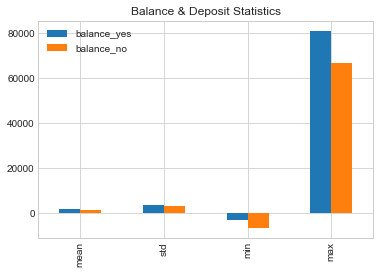

In [106]:
#Analysis of response column deposit, and comparing its values to other nemuericl columns
#balance & deposit
hdf = pd.DataFrame()
hdf["balance_yes"] = (df[df["deposit"] == 'yes']["balance"].describe())
hdf["balance_no"] = (df[df["deposit"] == 'no']["balance"].describe())
print(hdf)
#plotting the graph for the values mean, std, min and max
sar = hdf.drop(['count', '25%', '50%', '75%'])
sar.plot.bar(title = 'Balance & Deposit Statistics')

           age_yes       age_no
count  5289.000000  5873.000000
mean     41.670070    40.837391
std      13.497781    10.264815
min      18.000000    18.000000
25%      31.000000    33.000000
50%      38.000000    39.000000
75%      50.000000    48.000000
max      95.000000    89.000000


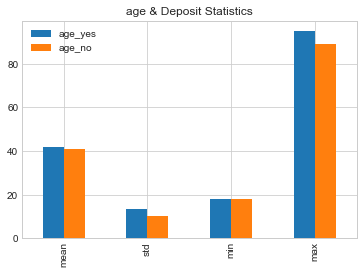

In [108]:
#age & deposit

adf = pd.DataFrame()
adf['age_yes'] = (df[df["deposit"] == "yes"]["age"].describe())
adf['age_no'] = (df[df["deposit"] == "no"]["age"].describe())
print(adf)
#plotting the graph for the values mean, std, min and max
kar = adf.drop(['count', '25%', '50%', '75%'])
kar.plot.bar(title = "age & Deposit Statistics")

               yes           no
count  5289.000000  5873.000000
mean      2.141047     2.839264
std       1.921826     3.244474
min       1.000000     1.000000
25%       1.000000     1.000000
50%       2.000000     2.000000
75%       3.000000     3.000000
max      32.000000    63.000000


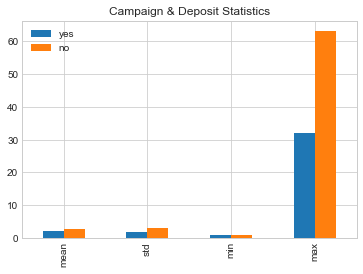

In [111]:
#campaign and deposit
cdf = pd.DataFrame()
cdf["yes"] = (df[df["deposit"] == "yes"]["campaign"].describe())
cdf["no"] = (df[df["deposit"] == "no"]["campaign"].describe())
print(cdf)
#plotting the graph for the values mean, std, min and max
karsar = cdf.drop(['count', '25%', '50%', '75%'])
karsar.plot.bar(title = "Campaign & Deposit Statistics")

               yes          no
count  5289.000000  5873.00000
mean      1.170354     0.52835
std       2.553272     1.97961
min       0.000000     0.00000
25%       0.000000     0.00000
50%       0.000000     0.00000
75%       1.000000     0.00000
max      58.000000    41.00000


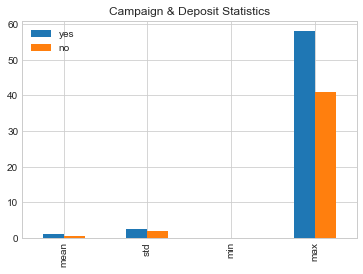

In [115]:
#number of contacts performed during previous campaign ('previous') and deposit
kdf = pd.DataFrame()
kdf["yes"] = (df[df["deposit"] == "yes"]["previous"].describe())
kdf["no"] = (df[df["deposit"] == "no"]["previous"].describe())
print(kdf)
#plotting the graph for the values mean, std, min and max
kasa = kdf.drop(['count', '25%', '50%', '75%'])
kasa.plot.bar(title = "Campaign & Deposit Statistics")

Looking at the diagrams above we can conclude that:

People who subscribed for term deposit tend to have greater balance and age values.
People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

In [18]:
df.head()

,age,job,marital,education,defaulters,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


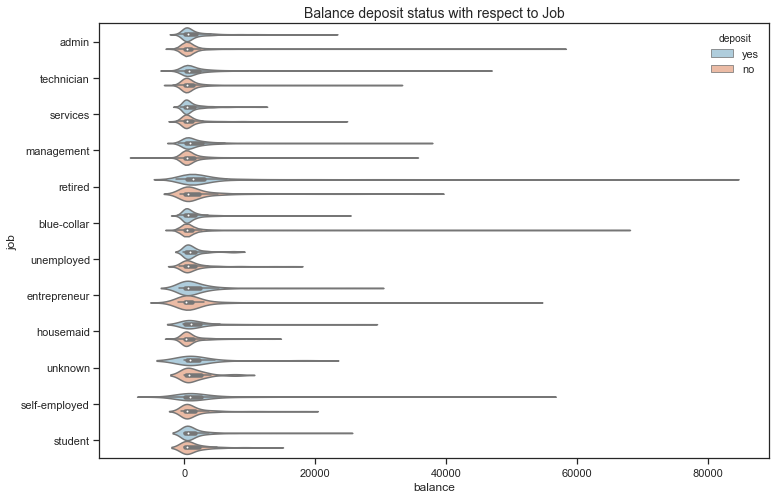

In [19]:
fig = plt.figure(figsize=(12, 8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r", data=df);

plt.title("Balance deposit status with respect to Job", fontsize=14)
plt.show()

In [126]:
#Checking the relation between balance, duration and age
x = df["balance"]
y = df["duration"]
z = df["age"]

trace = go.Scatter3d(
    x = x, 
    y = y, 
    z = z,
    mode = "markers", 
    marker=dict(
        size = 12, 
        color = z, 
        colorscale = "Viridis", 
        opacity = 0.8))
data = [trace]
layout = go.Layout(
    margin=dict(
        l = 0, 
        r = 0, 
        b = 0, 
        t = 0))

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Relation between 3 variables")

# (3) Preprocessing & Applying Machine Learning Algorithms

In [14]:
#Importing necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
#Converting categorical columns to dummy columns (i..e replacing with 0 and 1)
d1 = pd.get_dummies(df["job"])
dfjob = d1.drop(["unknown"], axis = 1)
dfjob.head()

,admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [16]:
d2 = pd.get_dummies(df['education'])
maritaldf = d2.drop(['unknown'],axis=1)
maritaldf.head()

,primary,secondary,tertiary
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [17]:
d3 = pd.get_dummies(df['contact'])
contactdf = d3.drop(['unknown'],axis=1)
contactdf.head()

,cellular,telephone
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [18]:
d4 = pd.get_dummies(df['poutcome'])
poutcomedf = d4.drop(['unknown'],axis=1)
poutcomedf.head()

,failure,other,success
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [19]:
#changing the response variable with 0 and 1
label_deposit = LabelEncoder()
df["deposit"] = label_deposit.fit_transform(df["deposit"])
df

,age,job,marital,education,defaulters,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [20]:
merged = pd.concat([df, dfjob, maritaldf, contactdf, poutcomedf],join='outer', axis=1)
merged.head()

,age,job,marital,education,defaulters,balance,housing,loan,contact,day,...,technician,unemployed,primary,secondary,tertiary,cellular,telephone,failure,other,success
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,0
1,56,admin,married,secondary,no,45,no,no,unknown,5,...,0,0,0,1,0,0,0,0,0,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1,0,0,1,0,0,0,0,0,0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,0
4,54,admin,married,tertiary,no,184,no,no,unknown,5,...,0,0,0,0,1,0,0,0,0,0


In [21]:
data = merged.drop(['marital','job', 'contact', 'poutcome', 'education', 'defaulters', 'housing', 'loan', 'day', 'month'], axis=1)
data

,age,balance,duration,campaign,pdays,previous,deposit,admin,blue-collar,entrepreneur,...,technician,unemployed,primary,secondary,tertiary,cellular,telephone,failure,other,success
0,59,2343,1042,1,-1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,56,45,1467,1,-1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,41,1270,1389,1,-1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,55,2476,579,1,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,54,184,673,2,-1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,-1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
11158,39,733,83,4,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11159,32,29,156,2,-1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
11160,43,0,9,2,172,5,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [22]:
data.isnull().sum()

age              0
balance          0
duration         0
campaign         0
pdays            0
previous         0
deposit          0
admin            0
blue-collar      0
entrepreneur     0
housemaid        0
management       0
retired          0
self-employed    0
services         0
student          0
technician       0
unemployed       0
primary          0
secondary        0
tertiary         0
cellular         0
telephone        0
failure          0
other            0
success          0
dtype: int64

In [23]:
#Splitting the data
x = data.drop("deposit", axis=1)
y = data["deposit"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20,random_state=5)

In [24]:
#Rfc
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
pred_rfc = rfc.predict(xtest)

C:\Users\Gollamudi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [25]:
print(classification_report(ytest, pred_rfc))
print(confusion_matrix(ytest, pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1170
           1       0.77      0.78      0.77      1063

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233

[[927 243]
 [239 824]]


In [26]:
#SVM
clf = svm.SVC()
clf.fit(xtrain, ytrain)
pred_clf = clf.predict(xtest)

C:\Users\Gollamudi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [27]:
print(classification_report(ytest, pred_clf))
print(confusion_matrix(ytest, pred_clf))

              precision    recall  f1-score   support

           0       0.52      0.96      0.68      1170
           1       0.43      0.03      0.05      1063

    accuracy                           0.52      2233
   macro avg       0.48      0.50      0.37      2233
weighted avg       0.48      0.52      0.38      2233

[[1129   41]
 [1032   31]]


In [28]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(ytest, pred_rfc)
cm

0.7841468875951635

In [29]:
mc = accuracy_score(ytest, pred_clf)
mc

0.5194805194805194

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
import warnings
warnings.filterwarnings(action="ignore")

In [32]:
svc= SVC(kernel = 'sigmoid')
svc.fit(xtrain, ytrain)
svcpred = svc.predict(xtest)
print(confusion_matrix(ytest, svcpred))
print(round(accuracy_score(ytest, svcpred),2)*100)
SVCCV = (cross_val_score(svc, xtrain, ytrain, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[550 620]
 [611 452]]
45.0


In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(xtrain,ytrain)
pred = model.predict(xtest)


print(confusion_matrix(ytest, pred))
print(round(accuracy_score(ytest, pred),2)*100)
LOGCV = (cross_val_score(model, xtrain, ytrain, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[991 179]
 [259 804]]
80.0


In [34]:
from sklearn.naive_bayes import GaussianNB
nmodel = GaussianNB()
nmodel.fit(xtrain, ytrain)
npred = nmodel.predict(xtest)

print(confusion_matrix(ytest, npred))
print(round(accuracy_score(ytest, npred),2)*100)
NBCV = (cross_val_score(nmodel, xtrain, ytrain, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[963 207]
 [385 678]]
73.0


In [35]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(model, xtrain, ytrain, cv=k_fold)

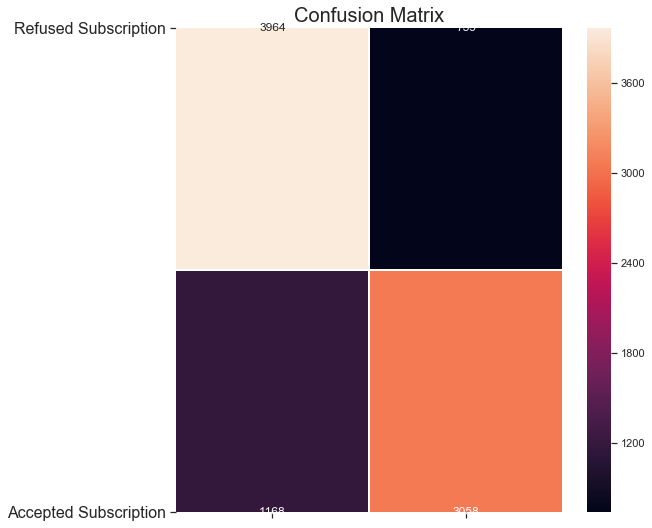

In [134]:
conf_matrix = confusion_matrix(ytrain, y_train_pred)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused Subscription', 'Accepted Subscription'], fontsize=16, rotation=360)
plt.show()